In [5]:
import pyabf  # import the package
import matplotlib.pyplot as plt

abf = pyabf.ABF("data/2025_12_04_0001.abf")  # load the file
abf.setSweep(0,channel= 0)  # Channel 0 is recording channel
spike_ch = abf.sweepY.copy()
time_vec = abf.sweepX.copy()

abf.setSweep(0,channel= 2)  # Channel 2 is Stim channel
stim_ch = abf.sweepY.copy()


Matplotlib is building the font cache; this may take a moment.


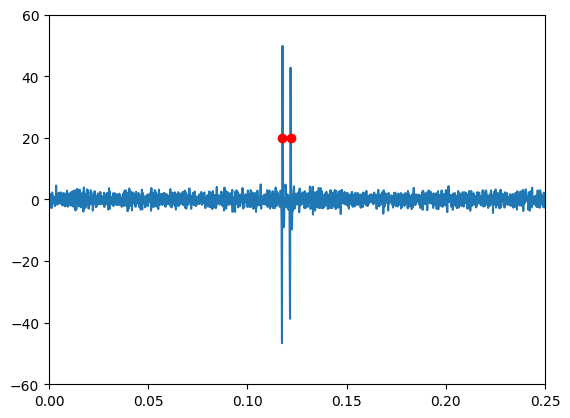

(np.float64(0.0), np.float64(5.0), np.float64(-60.0), np.float64(60.0))

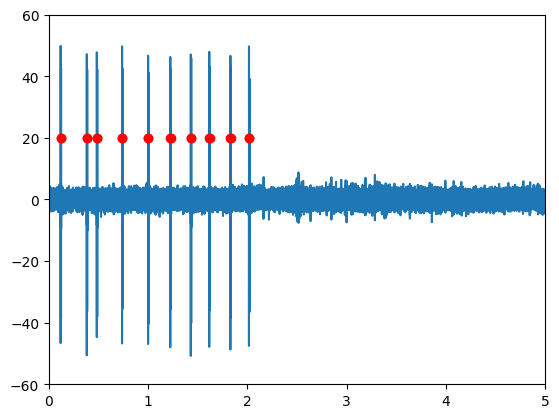

In [25]:
from scipy.signal import find_peaks 

peaks, _ = find_peaks(spike_ch, height = 20)
plt.plot(time_vec,spike_ch)
plt.plot(peaks/2e4,[20]*len(peaks),'o',c = 'red')
plt.axis([0, 0.25, -60, 60])
plt.show()


plt.plot(time_vec,spike_ch)
plt.plot(peaks/2e4,[20]*len(peaks),'o',c = 'red')
plt.axis([0, 5, -60, 60])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load CSV (assumes header row). If no header, set skip_header=0 and use column indices.
data = np.genfromtxt("data/2025_12_04_0001.csv", delimiter=",", names=True, dtype=None, encoding=None)

# Inspect column names:
print(data.dtype.names)

# Pull time and intensity columns (EDIT these names to match what you see above)
t = data["time_s"].astype(float)      # column 2
I = data["R"].astype(float)   # column 3 (or "B"/"G"/"R" etc.)

# Convert intensity -> Weber contrast (skip if already contrast)
I0 = np.mean(I)
c = (I - I0) / I0

dt = np.median(np.diff(t))
win_s = 0.200
L = int(win_s / dt)

spike_times = np.array(peaks, dtype=float)  # seconds

# Map spikes to nearest preceding stimulus sample
idx = np.searchsorted(t, spike_times) - 1
idx = idx[idx >= L]  # only spikes with enough history

# Spike-triggered snippets and average
snips = np.stack([c[i-L:i] for i in idx], axis=0)
sta = snips.mean(axis=0)

lags = -np.arange(L, 0) * dt  # seconds before spike (negative)

plt.plot(lags*1000, sta)
plt.axvline(0, linestyle="--")
plt.xlabel("Time before spike (ms)")
plt.ylabel("Weber contrast")
plt.show()


('frame', 'time_s', 'R', 'G', 'B')
